In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [2]:
text = ""
log_filename = 'train.log'

with open(log_filename, 'r') as f:
    text = f.read()

In [3]:
val_names = ['Set5', 'Set14']
metric_names = ['PSNR', 'SSIM']

save_every = 1000

lines = text.split('\n')

In [7]:
metrics = {}
paper_results = {
    'PSNR': {
        'Set5': 37.44,
        'Set14': 33.04
    },
    'SSIM': {
        'Set5': 0.9584,
        'Set14': 0.9127
    }
}

for metric in metric_names:
    metrics[metric] = {name: [] for name in val_names}

In [8]:
num_vals = len(val_names)


for i, line in enumerate(lines):
    for j, name in enumerate(val_names):
        if line.find(name) != -1 and line.find('Validation') != -1:
            psnr = float(lines[i + 1].split('\t')[1].split()[-1])
            ssim = float(lines[i + 2].split('\t')[1].split()[-1])
        
            metrics['PSNR'][name].append(psnr)
            metrics['SSIM'][name].append(ssim)

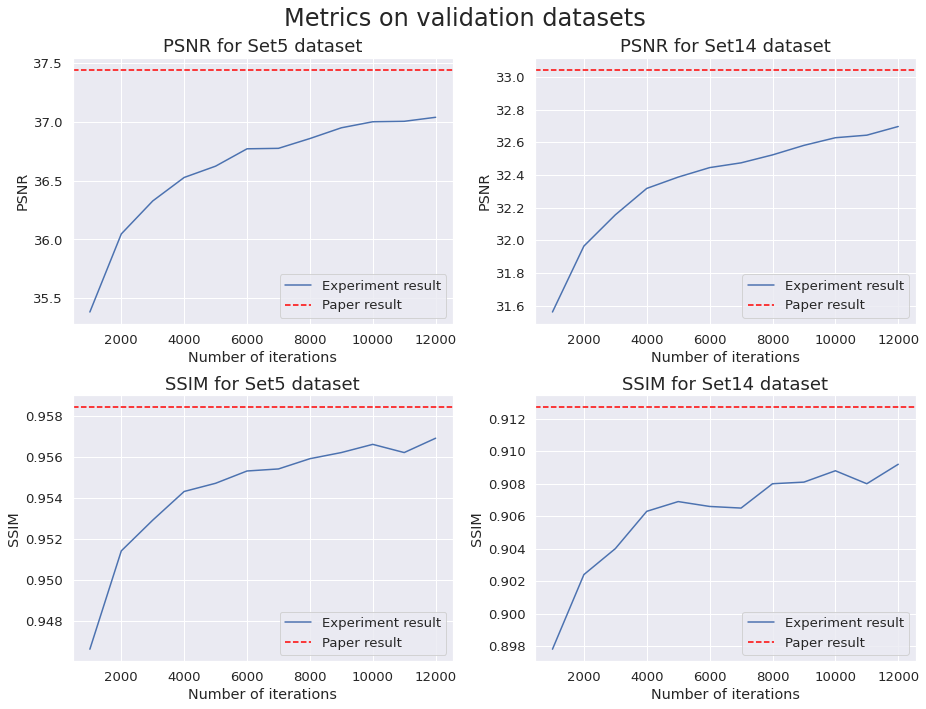

In [10]:
plt.figure(figsize=(13, 10))

for i, metric in enumerate(metrics.keys()):
    for j, (name, arr) in enumerate(metrics[metric].items()):
        plt.subplot(len(metric_names), len(val_names), i * len(val_names) + j + 1)
        
        plt.plot((np.arange(len(arr)) + 1) * save_every, arr, label='Experiment result')
        plt.axhline(paper_results[metric][name], linestyle='--', c='red', label='Paper result')
        plt.title(f"{metric} for {name} dataset", fontsize=18)
        plt.xlabel('Number of iterations')
        plt.ylabel(metric)
        plt.legend()
        
plt.suptitle('Metrics on validation datasets', fontsize=24)
plt.tight_layout()